A Monte Carlo simulation is a computational technique used to model the probability of different outcomes in uncertain situations. It relies on random sampling and statistical modeling to estimate risk and variability in decision-making.

Monte Carlo simulations use random sampling from probability distributions to model uncertainty. Common distributions include:Normal Distribution (Gaussian),Uniform Distribution,Log-Normal Distribution

this kind of Monte  generates random numbers (U) from a uniform distribution between 0 and 1:
And also i kind of learnt that For portfolio risk analysis, we estimate the Value at Risk (VaR) using Monte Carlo

# Monte Carlo Simulation in Human Words lol :) -> 

Depending on the problem we try to solve and their random variables and their distribution there may or may not be a deterministic solution :) its like if you give the same input in a deterministic algo it would give the same output ,however in practice like when deal with more complex random variables with different distributions it becomes challenging to work with a non normal multivariate distributions and working out an exact mathematical solution .. Thats where my guy Monte Carlo Comes in :) .... As we increase the no of simulations and how many samples we are taking from underlying distributions we hope to try converge on an exact sol ... yep thats monte carlo simulation lets implement it cuties ?

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np

In [12]:
# lets Imorting Data !?!

# yf.pdr_override()

def fetch_stock_data_yf(stocks, start, end):
    stockData = pd.DataFrame()
    for stock in stocks:
        stockData[stock] = yf.download(stock, start=start, end=end)['Close']
    meanReturns = stockData.pct_change().mean()
    covarianceMatrix = stockData.pct_change().cov()
    return meanReturns, covarianceMatrix

# Fetch using alternative method


stockList = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
end = dt.datetime.now()
start = end - dt.timedelta(days=400)

meanReturns, covarianceMatrix = fetch_stock_data_yf(stockList, start, end)
print("mean returns : ")
print(meanReturns)
print(" Covariance matrix : ")
print(covarianceMatrix)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

mean returns : 
AAPL     0.000985
GOOGL    0.000563
MSFT     0.000008
AMZN     0.001169
TSLA     0.002354
dtype: float64
 Covariance matrix : 
           AAPL     GOOGL      MSFT      AMZN      TSLA
AAPL   0.000219  0.000090  0.000087  0.000085  0.000207
GOOGL  0.000090  0.000339  0.000125  0.000179  0.000241
MSFT   0.000087  0.000125  0.000178  0.000157  0.000169
AMZN   0.000085  0.000179  0.000157  0.000316  0.000247
TSLA   0.000207  0.000241  0.000169  0.000247  0.001598


In [13]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

print(weights)

[0.26888909 0.15080201 0.20106995 0.12194963 0.25728932]


# Now for the Monte carlo simulation 

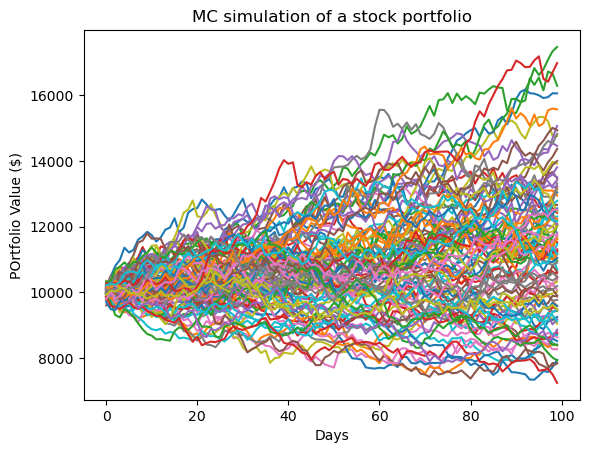

In [14]:

#Monte Carlo Method

#number of simulations
mc_sims = 100
T = 100 #timeframe in days

meanMatrix = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanMatrix = meanMatrix.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

intialPortfolio = 10000

# MC looping
for m in range(0, mc_sims):
  z = np.random.normal(size=(T, len(weights)))
  l = np.linalg.cholesky(covarianceMatrix)
  dailyReturns = meanMatrix + np.inner(l, z)
  portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*intialPortfolio

plt.plot(portfolio_sims)
plt.ylabel("POrtfolio Value ($)")
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")
plt.show()

